<a href="https://colab.research.google.com/github/Braelin2/ECGR5101HW2/blob/main/Homework2Problem3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/ECGR5105/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

In [3]:
from sklearn.model_selection import train_test_split

varlist =  ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

np.random.seed(0)
training, testing = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [4]:
theta0 = np.zeros(6)

n_iterations = 1000
learning_rate = 0.01
pen_var = 0.00001

In [5]:
def loss_func_Penalty(x_training, x_testing, y_training, y_testing, theta, learning, iterations, penalty):
    train_losses = []
    test_losses = []

    for i in range(iterations):
        thetaJ = np.square(np.sum(theta))
        gradients = (2 / len(x_training)) * x_training.T.dot(x_training.dot(theta) - y_training)
        theta = theta - (learning * gradients)

        train_loss = (1/len(x_training)) * np.sum(np.square(x_training.dot(theta) - y_training))+ ((penalty/len(x_training))*thetaJ)
        test_loss = (1/len(x_testing))*np.sum(np.square(x_testing.dot(theta) - y_testing))

        train_losses.append(train_loss)
        test_losses.append(test_loss)

    return train_losses, test_losses

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_normalization = MinMaxScaler()
scaler_standardization = StandardScaler()

#Standardization
#Scaling Training Set
training_scaled_standard = training
training_scaled_standard[varlist] = scaler_standardization.fit_transform(training_scaled_standard[varlist])

#Scaling Testing Set
testing_scaled_standard = testing
testing_scaled_standard[varlist] = scaler_standardization.fit_transform(testing_scaled_standard[varlist])

#Normalization
#Scaling Training Set
training_scaled_normal = training
training_scaled_normal[varlist] = scaler_normalization.fit_transform(training_scaled_normal[varlist])

#Scaling Testing Set
testing_scaled_normal = testing
testing_scaled_normal[varlist] = scaler_normalization.fit_transform(testing_scaled_normal[varlist])

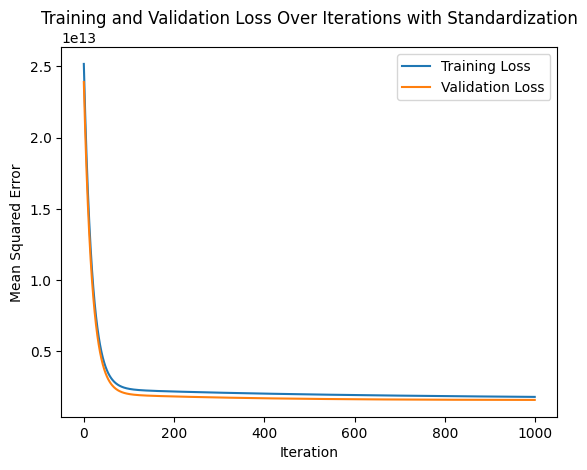

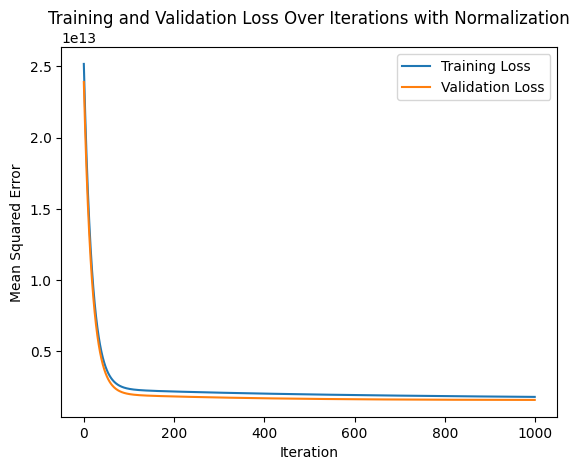

In [7]:
y_train = training.values[:, 0]
y_test = testing.values[:, 0]

X_S_train = np.c_[np.ones((len(y_train), 1)), training_scaled_standard[varlist]]
X_S_test = np.c_[np.ones((len(y_test), 1)), testing_scaled_standard[varlist]]

X_N_train = np.c_[np.ones((len(y_train), 1)), training_scaled_normal[varlist]]
X_N_test = np.c_[np.ones((len(y_test), 1)), testing_scaled_normal[varlist]]

train_loss_s, test_loss_s = loss_func_Penalty(X_S_train, X_S_test, y_train, y_test, theta0, learning_rate, n_iterations, pen_var)
train_loss_n, test_loss_n = loss_func_Penalty(X_N_train, X_N_test, y_train, y_test, theta0, learning_rate, n_iterations, pen_var)

# 4. Plot the training and validation loss after each iteration
plt.plot(train_loss_s, label="Training Loss")
plt.plot(test_loss_s, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations with Standardization")
plt.show()

# 4. Plot the training and validation loss after each iteration
plt.plot(train_loss_n, label="Training Loss")
plt.plot(test_loss_n, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations with Normalization")
plt.show()